In [1]:
import cv2
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pickle

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.metrics import accuracy_score

In [2]:
# Load the MNIST dataset
import mnist
X_train, y_train = mnist.train_images(), mnist.train_labels()
X_test, y_test = mnist.test_images(), mnist.test_labels()


In [3]:
# Reshape the training and test images
n_samples_train, nx_train, ny_train = X_train.shape
n_samples_test, nx_test, ny_test = X_test.shape
X_train = X_train.reshape((n_samples_train, nx_train * ny_train))
X_test = X_test.reshape((n_samples_test, nx_test * ny_test))

In [4]:
# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8755


In [9]:
# Save the trained model to a file using pickle
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(decision_tree, f)

Predicted digit: [0]


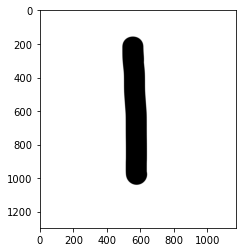

In [15]:
import cv2
import numpy as np
import pickle

# Load your own image using OpenCV
image_path = r"C:\Users\RITIKA\Downloads\IMG_0108.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to 28x28 pixels
resized_image = cv2.resize(image, (28, 28))

# Flatten the image array
flattened_image = resized_image.flatten()

# Reshape the flattened image array to match the shape expected by the Decision Tree model
image_to_predict = flattened_image.reshape(1, -1)

# Load your trained Decision Tree model using pickle
with open("decision_tree_model.pkl", "rb") as f:
    decision_tree = pickle.load(f)

# Predict the digit using the trained model
predicted_digit = decision_tree.predict(image_to_predict)

# Print the predicted digit
print("Predicted digit:", predicted_digit)
plt.imshow(image,cmap="gray")
